# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

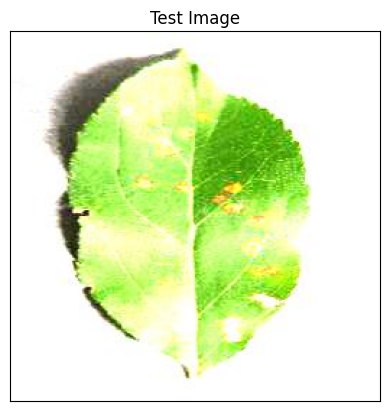

In [12]:
#Test Image Visualization
import cv2
image_path = 'test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [14]:
print(predictions)

[[9.0302941e-14 8.2733265e-16 1.0000000e+00 7.3672156e-15 3.8385267e-12
  2.3213045e-14 2.7414062e-18 4.5677844e-14 5.0665313e-18 3.6251591e-17
  8.9470787e-21 2.0295947e-15 1.9423118e-16 2.4252527e-17 6.7526472e-16
  5.2504429e-10 1.3887281e-15 1.6412829e-14 1.7395497e-13 9.7181430e-11
  5.3376888e-16 2.7473868e-16 4.2486734e-13 1.5789905e-14 6.0329518e-17
  1.5272906e-17 3.7326914e-18 3.5946434e-17 2.7547071e-12 3.8114179e-15
  3.9064907e-13 2.8087867e-16 3.2568254e-13 5.3065284e-15 2.3063051e-13
  4.6591640e-14 8.8384170e-15 6.1361972e-15]]


In [15]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


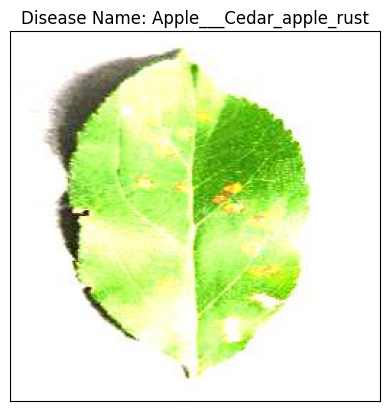

In [16]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()